# Anisotropía en objetos compactos

## Resolver ecuaciones de campo de Einstein para un objeto estático, simétricamente esférico y anisótropo

### Conociendo $\Delta = P_{\perp} - P$ y $\rho = \rho(r)$.

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import integrate
from scipy.integrate import solve_ivp
from matplotlib.patches import Polygon

In [2]:
plt.rcParams.update({'text.latex.preamble' : r'\usepackage{amssymb}'})
plt.rcParams.update({'text.usetex': True,'font.serif': 'sans-serif'})
plt.rcParams['xtick.labelsize'] = 11
plt.rcParams['ytick.labelsize'] = 12
#plt.rcParams['axes.spines.top'] = False
#plt.rcParams['axes.spines.right'] = False
plt.rcParams['figure.dpi'] = 150
plt.rcParams['axes.titley'] = 1.0
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['axes.labelsize'] = 10
plt.rcParams["savefig.dpi"] = 150
plt.rcParams["savefig.bbox"] = 'tight'

In [3]:
c = 2.997*10**(8)          # Velocidad de la luz en unidades S.I.
G = 6.673*10**(-11)        # Constante de gravitación universal en unidades S.I.
Msol = 1.989*10**(30)      # 1 Masa solar en kilogramos

In [4]:
# Ecuación de equilibrio hidrostático a resolver
def EcEqHid(x,P_,rho_c_til,varkappa,C):
    return -(rho_tilde(x,rho_c_til,varkappa) + P_)*(m_tilde(x,rho_c_til,varkappa) + 4*np.pi*x**(3)*P_)/x/(x - 2*m_tilde(x,rho_c_til,varkappa)) + 2*Delta_tilde(x,P_,rho_c_til,varkappa,C)/x

In [5]:
# Función densidad
def rho_tilde(x,rho_c_til,varkappa):
    return rho_c_til*(1-(1-varkappa)*x**2)

# Función masa
def m_tilde(x,rho_c_til,varkappa):
    return 4*np.pi*rho_c_til*((x**3/3)-(1-varkappa)*(x**5/5))

# Anisotropía Doneva
def Delta_tilde(x,P_,rho_c_til,varkappa,C):
    return 2*C*m_tilde(x,rho_c_til,varkappa)*P_/x

In [6]:
Lista_C = np.round(np.arange(0.0,3.34,3.34/100),3)
Lista_C = np.append(Lista_C,0.91)
Lista_C = [0.91]
print(*Lista_C, sep=', ')

Lista_rho_c = np.round(np.arange(0.1,2.8,0.3),2)
Lista_rho_c = [i*10**18 for i in Lista_rho_c]
print('Valores de \u03c1_c: ',end='')
print(*Lista_rho_c, sep=', ')

Lista_varkappa = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
print('Valores de \u03f0: ',end='')
print(*Lista_varkappa, sep=', ')

# Número total de modelos evaluados
Numero_de_modelos = len(Lista_C)*len(Lista_rho_c)*len(Lista_varkappa)
print('\nNúmero de modelos: ', Numero_de_modelos)

0.91
Valores de ρ_c: 1e+17, 4e+17, 7e+17, 1e+18, 1.3e+18, 1.6e+18, 1.9e+18, 2.2000000000000003e+18, 2.5e+18
Valores de ϰ: 0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9

Número de modelos:  90


In [7]:
%%time

Z = []

for i in range(len(Lista_C)):
    
    Z.append([])
    
    C = Lista_C[i]
    
    for j in range(len(Lista_rho_c)):
                
        rho_c = Lista_rho_c[j]
        
        for k in range(len(Lista_varkappa)):
                        
            varkappa = Lista_varkappa[k]
        
            M_odot = 2.08                     # Masa total en unidades de masa solar
            R = (M_odot*Msol/4/np.pi/rho_c/(1/3 - (1-varkappa)/5))**(1/3) 
            rho_c_til = G*R**2*rho_c/c**2 
            
    
            P0 = 0                 # Condición inicial para Ecuación de equilibrio hidrostático
        
            xmin = 10**-15   
            xmax = 1
            x_span = (xmax,xmin)   # Integración desde el borde (x=1) hacia el centro (x=0)
        
            soluciones = solve_ivp(EcEqHid,x_span,[P0],args=[rho_c_til,varkappa,C],method='RK45',max_step=1/50)
        
            P_til = soluciones.y[0]                                      # Presión radial adimensional
            x = soluciones.t                                             # Radio adimensional
            m_til = m_tilde(x,rho_c_til,varkappa)                        # Masa adimensional
            rho_til = rho_tilde(x,rho_c_til,varkappa)                    # Densidad de energía adimensional
            Delta_til = Delta_tilde(x,P_til,rho_c_til,varkappa,C)        # Anisotropía adimensional
            Pt_til = Delta_til + P_til                                   # Presión tangencial adimensional
            gradrho_til = np.gradient(rho_til,x)                         # Derivada de la densidad de energía adimensional
            gradP_til = np.gradient(P_til,x)                             # Derivada de la presión radial adimensional
            gradPt_til = np.gradient(Pt_til,x)                           # Derivada de la presión tangencial adimensional
            vs2 = gradP_til/gradrho_til                                  # Velocidad del sonido radial al cuadrado
            vst2 = gradPt_til/gradrho_til                                # Velocidad del sonido tangencial al cuadrado
            gradgradrho_til = np.gradient(gradrho_til,x)                 # Derivada segunda de la densidad de energía adimensional
            gradvs2 = np.gradient(vs2,x)                                 # Derivada de la velocidad del sonido radial al cuadrado
            var_rho_c = np.linspace(0.5*10**18,2.5*10**18,11)    
            var_rho_c_til = G*R**2*var_rho_c/c**2    
            var_M_til = 4*np.pi*var_rho_c_til*(1/3 - (1-varkappa)/5)     # M tilde en función de rho central tilde
        
            var_til = [rho_til,P_til,m_til]
        
            ## Condición 1
            C1 = 2*m_til/x
            if any(C1 >= 1): 
                Z[i].append(int(0))
                continue
            else: pass
        
            ## Condición 2
            C2A = rho_til
            C2B = P_til
            C2C = Pt_til
            C2 = [C2A,C2B,C2C]
            if any(C2[0] < 0) or any(C2[1] < 0) or any(C2[2] < 0): 
                Z[i].append(int(0))
                continue
            else: pass
        
            ## Condición 3
            C3A = gradrho_til
            C3B = gradP_til
            C3C = gradPt_til
            C3 = [C3A,C3B,C3C]
            if any(C3[0] > 0) or any (C3[1] > 0) or any (C3[2] > 0): 
                Z[i].append(int(0))
                continue
            else: pass
        
            ## Condición 4
            C4 = rho_til - P_til - 2*Pt_til
            if any(C4 < 0): 
                Z[i].append(int(0))
                continue
            else: pass
        
            ## Condición 5
            C5A = vs2             
            C5B = vst2   
            C5 = [C5A,C5B]
            if any(C5[0] > 1) or any(C5[1] > 1): 
                Z[i].append(int(0))
                continue
            else: pass
        
            ## Condición 6
            C6 = ((rho_til[1:] + P_til[1:])*vs2[1:]/P_til[1:])
            if any(C6 < 4/3): 
                Z[i].append(int(0))
                continue
            else: pass
        
            ## Condición 7
            C7 = var_M_til
        
            ## Condición 8
            C8rho = (m_til + 4*np.pi*x**3*P_til)/x/(x - 2*m_til)
            C8P = ((m_til + 4*np.pi*x**3*(rho_til + 2*P_til))/x/(x - 2*m_til) + 2/x)*vs2
            C8Pt = -(2/x)*vst2
            C8m = ((rho_til + P_til)*(1 + 8*np.pi*x**2*P_til)/(x - 2*m_til)**2)*(4*np.pi*x**2*rho_til/gradrho_til)
            C8dP = gradvs2 + vs2*gradgradrho_til/gradrho_til
            C8T = C8rho+C8P+C8Pt+C8m+C8dP
        
            C8 = [C8T,C8rho,C8P,C8Pt,C8m,C8dP]
            if any(np.diff(np.sign(C8[0][2:-1])) != 0): 
                Z[i].append(int(0))
                continue
            else: pass
        
            ## Condición 9
            C9 = gradgradrho_til
            
            
            Z[i].append(int(9))
            
                        
    Z[i] = np.flipud(np.array(Z[i]).reshape(len(Lista_rho_c),len(Lista_varkappa)).T)
    
    #print(len(np.where(Z[i] == 9)[0]),C)
    

Wall time: 1.06 s


In [8]:
Otros = []

#C_comp_ind = np.where(Lista_C == 0.22)[0][0]
C_comp_ind = -1

def Rkm(rho_c,varkappa):
    return np.round(((M_odot*Msol/4/np.pi/rho_c/(1/3 - (1-varkappa)/5))**(1/3))/1000,2)

def Compacidad(rho_c,varkappa):
    return np.round(2*4*np.pi*(G*(Rkm(rho_c,varkappa)*1000)**2*rho_c/c**2)*((1/3)-(1-varkappa)*(1/5)),2)

for i in range(len(Lista_C)):
    
    Otros.append([])
    
    if np.any(Z[C_comp_ind]-Z[i] < 0):
        
        for j in range(len(np.where(Z[C_comp_ind]-Z[i] < 0)[0])):
            
            Otros[i].append((Lista_C[i],Lista_rho_c[np.where(Z[C_comp_ind]-Z[i] < 0)[1][j]]/1000,
                             np.flipud(Lista_varkappa)[np.where(Z[C_comp_ind]-Z[i] < 0)[0][j]],
                            Rkm(Lista_rho_c[np.where(Z[C_comp_ind]-Z[i] < 0)[1][j]],
                               np.flipud(Lista_varkappa)[np.where(Z[C_comp_ind]-Z[i] < 0)[0][j]]),
                            Compacidad(Lista_rho_c[np.where(Z[C_comp_ind]-Z[i] < 0)[1][j]],
                                      np.flipud(Lista_varkappa)[np.where(Z[C_comp_ind]-Z[i] < 0)[0][j]])))
    
    else: pass
    
Otros = [i for j in Otros for i in j]

Otros

[]

In [9]:
DatosTabla = []

for i in range(len(np.where(Z[C_comp_ind] == 9)[0])):
    
    DatosTabla.append([Lista_C[C_comp_ind],Lista_rho_c[np.where(np.flipud(Z[C_comp_ind]).T == 9)[0][i]]/1000,
                      Lista_varkappa[np.where(np.flipud(Z[C_comp_ind]).T == 9)[1][i]],
                       Rkm(Lista_rho_c[np.where(np.flipud(Z[C_comp_ind]).T == 9)[0][i]],
                           Lista_varkappa[np.where(np.flipud(Z[C_comp_ind]).T == 9)[1][i]]),
                      Compacidad(Lista_rho_c[np.where(np.flipud(Z[C_comp_ind]).T == 9)[0][i]],
                                Lista_varkappa[np.where(np.flipud(Z[C_comp_ind]).T == 9)[1][i]])])  
    
    if DatosTabla[i][3] <= 13.1 and DatosTabla[i][3] >= 11.6:
        
        DatosTabla[i].append('A')
    
    else: pass
    
    
for j in range(len(Otros)): DatosTabla.append(Otros[j])

In [10]:
DatosTabla

[[0.91, 100000000000000.0, 0.0, 29.12, 0.21],
 [0.91, 100000000000000.0, 0.1, 27.79, 0.22],
 [0.91, 100000000000000.0, 0.2, 26.68, 0.23],
 [0.91, 100000000000000.0, 0.3, 25.73, 0.24],
 [0.91, 100000000000000.0, 0.4, 24.9, 0.25],
 [0.91, 100000000000000.0, 0.5, 24.16, 0.25],
 [0.91, 100000000000000.0, 0.6, 23.51, 0.26],
 [0.91, 100000000000000.0, 0.7, 22.92, 0.27],
 [0.91, 100000000000000.0, 0.8, 22.39, 0.27],
 [0.91, 400000000000000.0, 0.0, 18.34, 0.33],
 [0.91, 400000000000000.0, 0.1, 17.51, 0.35],
 [0.91, 400000000000000.0, 0.2, 16.81, 0.37],
 [0.91, 400000000000000.0, 0.3, 16.21, 0.38],
 [0.91, 400000000000000.0, 0.4, 15.68, 0.39],
 [0.91, 400000000000000.0, 0.5, 15.22, 0.4],
 [0.91, 400000000000000.0, 0.6, 14.81, 0.42],
 [0.91, 400000000000000.0, 0.7, 14.44, 0.43],
 [0.91, 700000000000000.0, 0.0, 15.22, 0.4],
 [0.91, 700000000000000.0, 0.1, 14.53, 0.42],
 [0.91, 700000000000000.0, 0.2, 13.95, 0.44],
 [0.91, 700000000000000.0, 0.3, 13.45, 0.46],
 [0.91, 700000000000000.0, 0.4, 13.01

In [11]:
A = [i for j in DatosTabla for i in j].count('A')
print('Número de modelos con Radio observado:',A)

Número de modelos con Radio observado: 9


In [12]:
C = Lista_C[C_comp_ind]

L_rho_c = np.round(np.arange(0.1,2.575,0.075),3)
L_rho_c = [i*10**18 for i in L_rho_c]
print('Valores de \u03c1_c: ',end='')
print(*L_rho_c, sep=', ')

L_varkappa = np.round(np.arange(0,0.925,0.025),3)
print('Valores de \u03f0: ',end='')
print(*L_varkappa, sep=', ')

rho_c = L_rho_c
varkappa = L_varkappa

X,Y = np.meshgrid(rho_c,varkappa)
Z_R = Rkm(X,Y)

Valores de ρ_c: 1e+17, 1.75e+17, 2.5e+17, 3.25e+17, 4e+17, 4.75e+17, 5.5000000000000006e+17, 6.25e+17, 7e+17, 7.75e+17, 8.5e+17, 9.25e+17, 1e+18, 1.075e+18, 1.1499999999999999e+18, 1.225e+18, 1.3e+18, 1.375e+18, 1.45e+18, 1.525e+18, 1.6e+18, 1.675e+18, 1.75e+18, 1.825e+18, 1.9e+18, 1.975e+18, 2.0499999999999997e+18, 2.125e+18, 2.2000000000000003e+18, 2.275e+18, 2.35e+18, 2.425e+18, 2.5e+18
Valores de ϰ: 0.0, 0.025, 0.05, 0.075, 0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875, 0.9


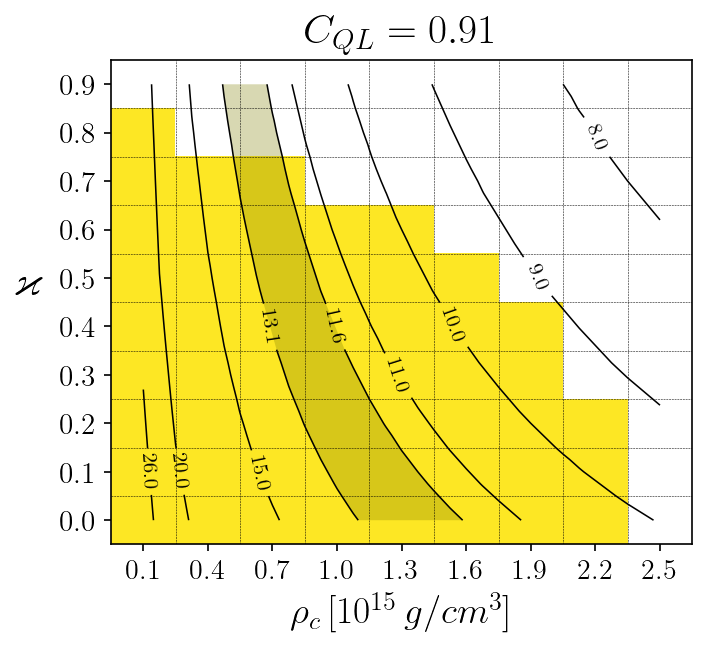

In [13]:
zim = np.flipud(Z[C_comp_ind])
fig,ax1 = plt.subplots(nrows=1,ncols=1,figsize=(5,8))
cs = ax1.contour(X/10**18,Y,Z_R,levels=[8,9,10,11,11.6,13.1,15,20,26],colors='black',linewidths=0.75)
manual_locations = [(2.3,0.8),(1.9,0.5),(1.5,0.4),(1.3,0.3),(1.0,0.4),(0.7,0.4),(0.7,0.1),(0.25,0.1),(0.1,0.1)]
ax1.clabel(cs,inline=True,fontsize=10,inline_spacing=30,manual=manual_locations)
cmap = matplotlib.cm.get_cmap('viridis').copy()
cmap.set_under(color='white')
im = plt.imshow(zim,aspect=2.25,cmap=cmap,origin='lower',extent=[-0.05,2.65,-0.05,0.95],vmin=4,vmax=9)
ax1.set_xlabel(r'$\rho_{c}\,[10^{15}\,g/cm^{3}]$',fontsize=18)
ax1.set_ylabel(r'$\varkappa$',fontsize=20,rotation=0,labelpad=15)
ax1.set_title(r'$C_{QL} = 0.91$',fontsize=20,x=0.5,y=1.01)
ax1.set_xticks([0.1,0.4,0.7,1.0,1.3,1.6,1.9,2.2,2.5])
ax1.set_yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]) 
ax1.set_xticks([0.25,0.55,0.85,1.15,1.45,1.75,2.05,2.35],minor=True)
ax1.set_yticks([0.05,0.15,0.25,0.35,0.45,0.55,0.65,0.75,0.85],minor=True)  
ax1.grid(which='minor',color='black',linestyle='dashed',linewidth=0.25)
ax1.tick_params(which='minor',bottom=False,left=False)
plt.xticks(fontsize=13.5),plt.yticks(fontsize=14)

path0 = np.concatenate((cs.collections[4].get_paths()[0].vertices,cs.collections[4].get_paths()[1].vertices))
path1 = np.flipud(np.concatenate((cs.collections[5].get_paths()[0].vertices,cs.collections[5].get_paths()[1].vertices)))
poly = Polygon(np.concatenate((path0,path1)),fc='olive',ec='None',alpha=0.3)
ax1.add_patch(poly)


plt.show()

In [14]:
Zotro = Z[C_comp_ind].copy()
Zotro[0][0], Zotro[1][1] = 10, 10
Zotro

array([[10,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 9, 10,  0,  0,  0,  0,  0,  0,  0],
       [ 9,  9,  9,  0,  0,  0,  0,  0,  0],
       [ 9,  9,  9,  9,  9,  0,  0,  0,  0],
       [ 9,  9,  9,  9,  9,  9,  0,  0,  0],
       [ 9,  9,  9,  9,  9,  9,  9,  0,  0],
       [ 9,  9,  9,  9,  9,  9,  9,  0,  0],
       [ 9,  9,  9,  9,  9,  9,  9,  9,  0],
       [ 9,  9,  9,  9,  9,  9,  9,  9,  0],
       [ 9,  9,  9,  9,  9,  9,  9,  9,  0]])

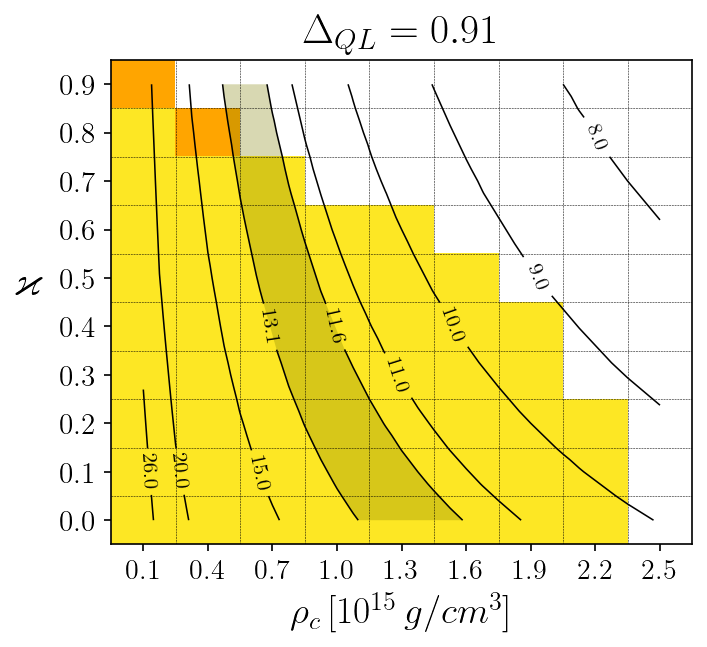

In [15]:
zim = np.flipud(Zotro)
fig,ax1 = plt.subplots(nrows=1,ncols=1,figsize=(5,8))
cs = ax1.contour(X/10**18,Y,Z_R,levels=[8,9,10,11,11.6,13.1,15,20,26],colors='black',linewidths=0.75)
manual_locations = [(2.3,0.8),(1.9,0.5),(1.5,0.4),(1.3,0.3),(1.0,0.4),(0.7,0.4),(0.7,0.1),(0.25,0.1),(0.1,0.1)]
ax1.clabel(cs,inline=True,fontsize=10,inline_spacing=30,manual=manual_locations)
cmap = matplotlib.cm.get_cmap('viridis').copy()
cmap.set_under(color='white')
cmap.set_over(color='orange')
im = plt.imshow(zim,aspect=2.25,cmap=cmap,origin='lower',extent=[-0.05,2.65,-0.05,0.95],vmin=4,vmax=9)
ax1.set_xlabel(r'$\rho_{c}\,[10^{15}\,g/cm^{3}]$',fontsize=18)
ax1.set_ylabel(r'$\varkappa$',fontsize=20,rotation=0,labelpad=15)
ax1.set_title(r'$\Delta_{QL} = 0.91$',fontsize=20,x=0.5,y=1.01)
ax1.set_xticks([0.1,0.4,0.7,1.0,1.3,1.6,1.9,2.2,2.5])
ax1.set_yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]) 
ax1.set_xticks([0.25,0.55,0.85,1.15,1.45,1.75,2.05,2.35],minor=True)
ax1.set_yticks([0.05,0.15,0.25,0.35,0.45,0.55,0.65,0.75,0.85],minor=True)  
ax1.grid(which='minor',color='black',linestyle='dashed',linewidth=0.25)
ax1.tick_params(which='minor',bottom=False,left=False)
plt.xticks(fontsize=13.5),plt.yticks(fontsize=14)

path0 = np.concatenate((cs.collections[4].get_paths()[0].vertices,cs.collections[4].get_paths()[1].vertices))
path1 = np.flipud(np.concatenate((cs.collections[5].get_paths()[0].vertices,cs.collections[5].get_paths()[1].vertices)))
poly = Polygon(np.concatenate((path0,path1)),fc='olive',ec='None',alpha=0.3)
ax1.add_patch(poly)


plt.show()

In [16]:
ZQL = Z[C_comp_ind].copy()
%store ZQL

Stored 'ZQL' (ndarray)
